# Part 1 - Create Data

## Prepare PrepPy

In [ ]:
# ! git clone https://github.com/gitmystuff/preppy.git

In [ ]:
# import shutil

# # Source file path (within your Drive)
# source_file = '/content/drive/MyDrive/Colab Notebooks/preppy report.py'

# # Destination path (root of your Drive)
# destination_path = '/content/preppy/utils/report.py'

# # Copy the file
# shutil.copy(source_file, destination_path)

## Create the Data

### Seed the Project

In [ ]:
# seed
import random

seed_id = 123456789
random_state = random.seed(seed_id)
random_state

### Faker

In [ ]:
# pip install Faker

In [ ]:
state_names=["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]

In [ ]:
# create demographic data
import numpy as np
import pandas as pd
from faker import Faker
fake = Faker()

output = []
for x in range(1000):
  binary = np.random.choice(['binary_1', 'binary_2'], p=[0.5, 0.5])
  output.append({
        'binary': binary, # sex assigned at birth
        'given_name': fake.first_name_female() if binary=='binary_1' else fake.first_name_male(),
        'surname': fake.last_name(),
        'date_of_birth': fake.date_of_birth(),
        'phone_number': fake.phone_number(),
        'email': fake.email(),
        'address': fake.address(),
        'city': fake.city(),
        'state': np.random.choice(state_names),
        'zipcode': fake.zipcode(),
        })

demographics = pd.DataFrame(output)
demographics.head()

,binary,given_name,surname,date_of_birth,phone_number,email,address,city,state,zipcode
0,binary_2,Kevin,Landry,1989-05-28,279.391.8227,rachelgonzalez@example.net,Unit 0834 Box 9260\nDPO AA 17860,Rachelfurt,Connecticut,02465
1,binary_2,Spencer,Robertson,2016-11-24,001-576-734-9772x71766,sylvia13@example.com,"659 Fitzpatrick Keys Suite 024\nPort Cynthia, ...",South Elizabethshire,New York,37282
2,binary_1,Erica,Hurley,1936-10-29,+1-204-665-5879x9860,jeanne31@example.net,"31799 Stephen Flats\nFostershire, NJ 18510",Novakshire,Pennsylvania,15896
3,binary_1,Lauren,Tucker,2008-06-27,8528925338,hartmichael@example.net,Unit 9036 Box 6259\nDPO AA 05068,Davidburgh,Nebraska,57592
4,binary_1,Toni,Jenkins,1920-12-21,+1-679-393-3485x37854,thompsonlisa@example.com,"1094 Rowland Cove Apt. 700\nBrownmouth, DE 54543",East Nicholastown,Vermont,91034


In [ ]:
def parse_address_v2(text):
  """
  Parses an address string into street address, city, state, and zipcode.
  This version handles potential variations in the input format.

  Args:
    text: The address string to parse.

  Returns:
    A dictionary containing the parsed address components.
  """

  try:
    # Split the input into lines
    lines = text.strip().split('\n')

    # Extract the street address from the first line
    street_address = lines[0].strip()

    # Extract the city, state, and zipcode from the second line
    city_state_zip = lines[1].strip().split(',')
    city = city_state_zip[0].strip()
    state_zip = city_state_zip[1].strip().split()
    state = state_zip[0].strip()
    zipcode = state_zip[1].strip()

    return {
        'street_address': street_address,
        'city': city,
        'state': state,
        'zipcode': zipcode
    }

  except (IndexError, ValueError):
    return None

# Example usage
text = "80974 Jeffrey Mountains\nWest Benjamin, IL 82801"
address = parse_address_v2(text)

if address:
  print(address)
else:
  print("Could not parse the address.")

{'street_address': '80974 Jeffrey Mountains', 'city': 'West Benjamin', 'state': 'IL', 'zipcode': '82801'}


In [ ]:
# Apply the parse_address function to each row of the 'address' column
demographics[['nu_address', 'nu_city', 'nu_state', 'nu_zipcode']] = demographics['address'].apply(lambda x: pd.Series(parse_address_v2(x)))

demographics.head()

,binary,given_name,surname,date_of_birth,phone_number,email,address,city,state,zipcode,nu_address,nu_city,nu_state,nu_zipcode
0,binary_2,Kevin,Landry,1989-05-28,279.391.8227,rachelgonzalez@example.net,Unit 0834 Box 9260\nDPO AA 17860,Rachelfurt,Connecticut,02465,NaN,NaN,NaN,NaN
1,binary_2,Spencer,Robertson,2016-11-24,001-576-734-9772x71766,sylvia13@example.com,"659 Fitzpatrick Keys Suite 024\nPort Cynthia, ...",South Elizabethshire,New York,37282,659 Fitzpatrick Keys Suite 024,Port Cynthia,MP,74681
2,binary_1,Erica,Hurley,1936-10-29,+1-204-665-5879x9860,jeanne31@example.net,"31799 Stephen Flats\nFostershire, NJ 18510",Novakshire,Pennsylvania,15896,31799 Stephen Flats,Fostershire,NJ,18510
3,binary_1,Lauren,Tucker,2008-06-27,8528925338,hartmichael@example.net,Unit 9036 Box 6259\nDPO AA 05068,Davidburgh,Nebraska,57592,NaN,NaN,NaN,NaN
4,binary_1,Toni,Jenkins,1920-12-21,+1-679-393-3485x37854,thompsonlisa@example.com,"1094 Rowland Cove Apt. 700\nBrownmouth, DE 54543",East Nicholastown,Vermont,91034,1094 Rowland Cove Apt. 700,Brownmouth,DE,54543


In [ ]:
# drop address, city, state, zipcode and rename nu_ etc.
demographics.drop(['address', 'city', 'state', 'zipcode'], axis=1, inplace=True)
demographics.rename(columns={'nu_address': 'address', 'nu_city': 'city', 'nu_state': 'state', 'nu_zipcode': 'zipcode'}, inplace=True)
demographics.head()

,binary,given_name,surname,date_of_birth,phone_number,email,address,city,state,zipcode
0,binary_2,Kevin,Landry,1989-05-28,279.391.8227,rachelgonzalez@example.net,NaN,NaN,NaN,NaN
1,binary_2,Spencer,Robertson,2016-11-24,001-576-734-9772x71766,sylvia13@example.com,659 Fitzpatrick Keys Suite 024,Port Cynthia,MP,74681
2,binary_1,Erica,Hurley,1936-10-29,+1-204-665-5879x9860,jeanne31@example.net,31799 Stephen Flats,Fostershire,NJ,18510
3,binary_1,Lauren,Tucker,2008-06-27,8528925338,hartmichael@example.net,NaN,NaN,NaN,NaN
4,binary_1,Toni,Jenkins,1920-12-21,+1-679-393-3485x37854,thompsonlisa@example.com,1094 Rowland Cove Apt. 700,Brownmouth,DE,54543


### Create Independent Variable Correlated with Class

In [ ]:
import numpy as np
import pandas as pd

def generate_feature(df, class_col, coeff, intercept):
    """
    Generates normally distributed feature data for a logistic regression model.

    Args:
        df: The pandas DataFrame containing the class column.
        class_col: The name of the class column (containing 0s and 1s).
        coeff: The coefficient for the feature in the logistic regression model.
        intercept: The intercept of the logistic regression model.

    Returns:
        A pandas Series containing the generated feature data.
    """

    # Generate probabilities based on the class
    probs = np.random.rand(len(df))  # Initial random probabilities
    probs = np.where(df[class_col] == 1, probs * 0.8 + 0.2, probs * 0.8)  # Adjust for class

    # Apply the inverse logit (logit) function
    logits = np.log(probs / (1 - probs))

    # Calculate the feature values
    feature_values = (logits - intercept) / coeff

    return pd.Series(feature_values)



### Make Classification

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

def make_linear_y(row):
  model = LogisticRegression()
  model.fit(X, y)
  coefficients = model.coef_
  intercept = model.intercept_
  f_of_x = intercept + coefficients[0][0]*row['informative_1'] + coefficients[0][1]*row['informative_2']
  # print(f_of_x[0])
  return f_of_x[0]

# Adjust the make_classification parameters:
# Set n_informative and n_redundant to values that sum to less than n_features
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, random_state=42)
df = pd.DataFrame(X, columns=['informative_1', 'informative_2'])
df = pd.concat([demographics, df], axis=1).reset_index(drop=True)

df['target'] = df.apply(make_linear_y, axis=1) # an independent variable
df['class'] = y # the dependent variable
df['corr_feature_class'] = generate_feature(df, 'class', 0.5, -1)
df.head()

,binary,given_name,surname,date_of_birth,phone_number,email,address,city,state,zipcode,informative_1,informative_2,target,class,corr_feature_class
0,binary_2,Kevin,Landry,1989-05-28,279.391.8227,rachelgonzalez@example.net,NaN,NaN,NaN,NaN,-0.999102,-0.663860,-0.904224,1,2.769979
1,binary_2,Spencer,Robertson,2016-11-24,001-576-734-9772x71766,sylvia13@example.com,659 Fitzpatrick Keys Suite 024,Port Cynthia,MP,74681,1.246686,1.153597,2.324370,1,2.782714
2,binary_1,Erica,Hurley,1936-10-29,+1-204-665-5879x9860,jeanne31@example.net,31799 Stephen Flats,Fostershire,NJ,18510,0.962777,0.859397,1.778217,1,2.609338
3,binary_1,Lauren,Tucker,2008-06-27,8528925338,hartmichael@example.net,NaN,NaN,NaN,NaN,-2.957441,2.033645,5.451235,1,4.873167
4,binary_1,Toni,Jenkins,1920-12-21,+1-679-393-3485x37854,thompsonlisa@example.com,1094 Rowland Cove Apt. 700,Brownmouth,DE,54543,1.141165,1.059449,2.153926,1,0.071820


### Automation Functions

1. gen_null(series, perc)
2. gen_quasi_constants(primary_label, variation_percentage=.2, replace=False)
3. gen_normal_data(mu=0, std=1, size=len(df))
4. gen_uniform_data(size=len(df))
5. gen_multivariate_normal_data(mean=[0, 0], cov=[[1, 0], [0, 1]], size=len(df))
6. gen_correlated_normal_series(original_series, target_correlation, size=len(df))
7. gen_correlated_uniform_series(original_series, correlation_coefficient=0, size=len(df))
8. gen_outliers(mean=0, std_dev=1, size=len(df), outlier_percentage=0.1, outlier_magnitude=3)
9. gen_standard_scaling(mean=50, std_dev=10, size=len(df), scale_factor=1000)
10. gen_minmax_scaling(mean=50, std_dev=10, size=len(df), range_factor=10)
11. random_choice_data(choices, size)

In [ ]:
# functions
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize


def gen_null(series, perc):
  """
  Introduces null values (np.nan) into a list based on a specified percentage.

  Args:
      var: The variable to modify.
      perc: The percentage of values to replace with nulls (0-100).

  Returns:
      The modified variable with null.
  """
  var = series.copy()
  num_nulls = int(len(var) * (perc / 100))
  indices_to_replace = np.random.choice(len(var), num_nulls, replace=False)

  for idx in indices_to_replace:
      var[idx] = np.nan

  return var

def gen_quasi_constants(primary_label, variation_percentage=.2, size=len(df)):
  """
  Generates quasi-constant labels for a Series, with a small percentage of variation.

  Args:
      primary_label: The main label to use for most values.
      variation_percentage: The percentage of labels to vary (0-100).

  Returns:
      A new Series containing the quasi-constant labels.
  """

  series = pd.Series(np.full(size, primary_label))
  num_variations = int(size * (variation_percentage / 100))
  variation_indices = np.random.choice(series.index, num_variations, replace=False)
  primary_label = primary_label + '_0'
  variation1 = primary_label + '_1'
  variation2 = primary_label + '_2'

  labels = pd.Series([primary_label] * len(series), index=series.index)
  labels.loc[variation_indices] = np.random.choice([variation1, variation2], size=num_variations)  # Adjust variations as needed

  return labels

def gen_normal_data(mu=0, std=1, size=len(df)):
  """
  Generates a normal dataset given the mean and standard deviation

  Args:
        mu: The mean of the normal distribution.
        std: The standard deviation of the normal distribution.
        size: The number of data points to generate.

  Returns:
        A normally distributed series.
  """
  return np.random.normal(mu, std, size)

def gen_uniform_data(size=len(df)):
  """
  Generates a uniform dataset

  Args:
        size: The number of data points to generate.

  Returns:
        A uniform distributed series.
  """
  return np.random.uniform(size=size)

def gen_multivariate_normal_data(mean=[0, 0], cov=[[1, 0], [0, 1]], size=len(df)):
  """
  Generates two datasets with a multivariate normal distribution given the mean and covariance matrix

  Args:
        mean: The mean of each of the datasets.
        cov: The covariance matrix of the datasets.
        size: The number of data points to generate.

  Returns:
        Two correlated series.
  """
  ds1, ds2 = np.random.multivariate_normal(mean, cov, size, tol=1e-6).T # ds = dataset
  return ds1, ds2

def gen_correlated_normal_series(original_series, target_correlation, size=len(df)):
  """
  Generates a correlated series based on a given series.

  This function takes an original series as input and generates a new series
  that is correlated with the original series. The correlation between the
  original and generated series is approximately equal to the specified
  target correlation.

  The generated series is created by linearly transforming the original series
  and adding Gaussian noise with an adjusted standard deviation to achieve the
  desired correlation.

  Args:
      original_series (numpy.ndarray): The original series.
      target_correlation (float): The desired Pearson correlation coefficient
          between the original and generated series.

  Returns:
      numpy.ndarray: The generated correlated series.
  """
  return np.mean(original_series) + target_correlation * (original_series - np.mean(original_series)) \
  +  np.random.normal(0, np.sqrt(1 - target_correlation**2) * np.std(original_series), len(original_series))
  """
  Explanation

  This one-liner leverages the properties of linear transformations and normal distributions to generate a correlated series.

  It first centers the original_series by subtracting its mean.
  It then scales this centered series by the target_correlation.
  Finally, it adds Gaussian noise with a standard deviation adjusted to ensure the overall correlation matches the target_correlation.
  """

def gen_correlated_uniform_series(original_series, correlation_coefficient=0, size=len(df)):
  """
  Work in progress

  Generates a new series correlated with the given series based on the specified correlation coefficient,
  using rank correlation to ensure the generated series follows a uniform distribution.

  Args:
      original_series (numpy.ndarray or list): The original series.
      correlation_coefficient (float): The desired correlation coefficient between the original and generated series.
      size: The number of data points to generate.

  Returns:
      The generated correlated series with a uniform distribution.
  """
  z_scores = (original_series - np.mean(original_series)) / np.std(original_series)
  correlation_coefficient=.7
  return norm.cdf(correlation_coefficient * norm.ppf(np.random.uniform(size=size)) + np.sqrt(1 - correlation_coefficient**2) * z_scores)

def pearson_r_func(x, y, y_mean, y_std, desired_r):
    x_mean = np.mean(x)
    x_std = np.std(x)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = x_std * y_std * len(x)
    calculated_r = numerator / denominator
    return (calculated_r - desired_r)**2  # Minimize the squared difference

def minimize_r(original_series, target_correlation, size=len(df)):
    y = original_series
    y_mean = np.mean(y)
    y_std = np.std(y)
    desired_r = target_correlation

    # Initial guess for x values
    x0 = np.random.uniform(size=len(original_series))

    # Solve for x
    result = minimize(pearson_r_func, x0, args=(y, y_mean, y_std, desired_r))

    if result.success:
        x_solution = result.x
        # print("Solution for x:", x_solution)
        return x_solution
    else:
        print("Optimization failed.")

def gen_outliers(mean=0, std_dev=1, size=len(df), outlier_percentage=0.1, outlier_magnitude=3):
    """
    Generates a normal distribution with outliers.

    Args:
        mean (float): The mean of the normal distribution.
        std_dev (float): The standard deviation of the normal distribution.
        size (int): The number of samples to generate.
        outlier_percentage (float): The percentage of outliers to introduce (between 0 and 1).
        outlier_magnitude (float): The magnitude by which outliers deviate from the mean.

    Returns:
        numpy.ndarray: The generated data with outliers.
    """
    data = np.random.normal(mean, std_dev, size)
    num_outliers = int(size * outlier_percentage)
    outlier_indices = np.random.choice(size, num_outliers, replace=False)
    for index in outlier_indices:
        if np.random.rand() < 0.5:
            data[index] += outlier_magnitude
        else:
            data[index] -= outlier_magnitude

    return data

def gen_standard_scaling(mean=50, std_dev=10, size=len(df), scale_factor=1000):
  """
  Generates data with a specified mean and standard deviation, then scales it by a factor to create a distribution needing scaling.

  Args:
      mean (float): The mean of the original distribution.
      std_dev (float): The standard deviation of the original distribution.
      size (int): The number of samples to generate.
      scale_factor (float): The factor by which to scale the original distribution.

  Returns:
      numpy.ndarray: The generated data needing scaling.
  """
  original_data = np.random.normal(mean, std_dev, size)
  return original_data * scale_factor

def gen_minmax_scaling(mean=50, std_dev=10, size=len(df), range_factor=10):
  """
  Generates data with a specified mean and standard deviation, then scales and shifts it to create a distribution needing MinMax scaling.

  Args:
      mean (float): The mean of the original distribution.
      std_dev (float): The standard deviation of the original distribution.
      size (int): The number of samples to generate.
      range_factor (float): The factor to expand the range of the original distribution.

  Returns:
      numpy.ndarray: The generated data needing scaling.
  """

  # Generate the original data
  original_data = np.random.normal(mean, std_dev, size)

  # Expand the range of the data
  min_val = np.min(original_data)
  max_val = np.max(original_data)
  return (original_data - min_val) * range_factor + min_val

def random_choice_data(choices, size):
  """
  Generates a new series correlated with the given series based on the specified correlation coefficient,
  using rank correlation to ensure the generated series follows a uniform distribution.

  Args:
      original_series (numpy.ndarray or list): The original series.
      correlation_coefficient (float): The desired correlation coefficient between the original and generated series.

  Returns:
      numpy.ndarray: The generated correlated series with a uniform distribution.
  """
  return np.random.choice(choices, size=size)


In [ ]:
# categorical variables with little correlation to sales
df['random choice 2'] = random_choice_data(['Rand Choice 1', 'Rand Choice 2'], size=len(df))
df['random choice 4'] = random_choice_data(['North', 'South', 'East', 'West'], size=len(df))
df['random choice 7'] = random_choice_data(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], size=len(df))

# categorical random choices with random # of labels
num_labels = np.random.randint(3, 5)
df[f'random label num {num_labels}'] = random_choice_data([f'label num lo {i}' for i in range(1, num_labels + 1)], size=len(df))

num_labels = np.random.randint(10, 15)
df[f'random label num {num_labels}'] = random_choice_data([f'label num hi {i}' for i in range(1, num_labels + 1)], size=len(df))

In [ ]:
# categorical variables correlated with target
df['pd qcut1'] = pd.qcut(df['target'], 2, labels=['Low', 'High']) # bi label
df['pd qcut2'] = pd.qcut(df['target'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4']) # 4 labels

quantiles = [0, 0.1, 0.2, 0.4, 0.6, 0.8, 1]
df['pd qcut3'] = pd.qcut(df['target'], quantiles, labels=['G1', 'G2', 'G3', 'G4', 'G5', 'G6']) # 6 labels

In [ ]:
# generate four numerical normally distributed continuous features that have a correlation greater than absolute value of .5 with each other
# gen_multivariate_normal_data(mean=[0, 0], cov=[[1, 0], [0, 1]], size=len(df))
df['multicollinearity 1'], df['multicollinearity 2'] = gen_multivariate_normal_data(mean=[0, 0], cov=[[1, .7], [.7, 1]], size=len(df))
df['multicollinearity 3'], df['multicollinearity 4'] = gen_multivariate_normal_data(mean=[0, 0], cov=[[1, .9], [.9, 1]], size=len(df))

In [ ]:
# generate two normally distributed features that are correlated with the target
# gen_correlated_normal_series(original_series, target_correlation, size=len(df))
df['correlated w target 1'] = gen_correlated_normal_series(df['target'], target_correlation=.5)
df['correlated w target 2'] = gen_correlated_normal_series(df['target'], target_correlation=.7)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   binary                 1000 non-null   object  
 1   given_name             1000 non-null   object  
 2   surname                1000 non-null   object  
 3   date_of_birth          1000 non-null   object  
 4   phone_number           1000 non-null   object  
 5   email                  1000 non-null   object  
 6   address                898 non-null    object  
 7   city                   898 non-null    object  
 8   state                  898 non-null    object  
 9   zipcode                898 non-null    object  
 10  informative_1          1000 non-null   float64 
 11  informative_2          1000 non-null   float64 
 12  target                 1000 non-null   float64 
 13  class                  1000 non-null   int64   
 14  corr_feature_class     1000 non-null   fl

                uniform corr 1  uniform corr 2    target
uniform corr 1        1.000000        0.472197  0.687678
uniform corr 2        0.472197        1.000000  0.682066
target                0.687678        0.682066  1.000000


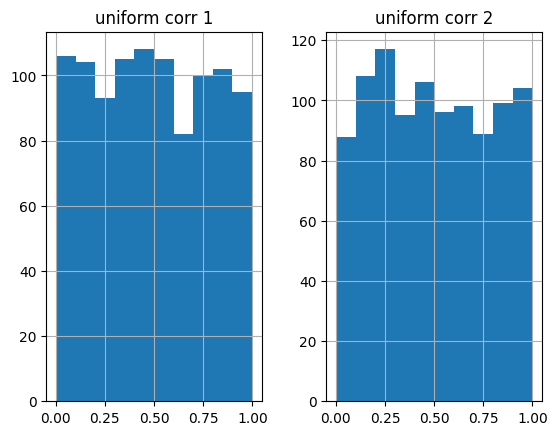

In [ ]:
# generate two uniformly distributed features that are correlated with the target
# gen_correlated_uniform_series(original_series, correlation_coefficient=0, size=len(df))
df['uniform corr 1'] = gen_correlated_uniform_series(df['target'])
df['uniform corr 2'] = gen_correlated_uniform_series(df['target'])

print(df[['uniform corr 1', 'uniform corr 2', 'target']].corr())
df[['uniform corr 1', 'uniform corr 2']].hist();

In [ ]:
# create two features that are duplicates of other features
df['duplicate_1'] = df['informative_1']
df['duplicate_2'] = df['informative_2']

In [ ]:
# create two numerical features with outliers
df['outliers 1'] = gen_outliers(mean=0, std_dev=1, size=len(df), outlier_percentage=0.1, outlier_magnitude=3)
df['outliers 2'] = gen_outliers(mean=3, std_dev=2, size=len(df), outlier_percentage=0.2, outlier_magnitude=2)

In [ ]:
# create a numerical feature that needs standard scaling
df['standard scaling'] = gen_standard_scaling()

In [ ]:
# create a numerical feature that needs min max scaling
df['min max scaling'] = gen_minmax_scaling()

In [ ]:
# generate null values
for col in df.drop(['class', 'informative_1', 'informative_2', 'target', 'duplicate_1', 'duplicate_2'], axis=1).columns:
    df[col] = gen_null(df[col], np.random.choice([0, 5, 10, 20, 30, 50], size=1).item())

In [ ]:
# create two features that have constant values
df['constant_1'] = 'constant_value'
df['constant_2'] = 'constant_value'

In [ ]:
# create two features with semi constant values
df['semi_constant_1'] = gen_quasi_constants('q_const', variation_percentage = 1)
df['semi_constant_2'] = gen_quasi_constants('q_const', variation_percentage = 1)

In [ ]:
print(df.info())  # check your work

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   binary                 1000 non-null   object  
 1   given_name             700 non-null    object  
 2   surname                700 non-null    object  
 3   date_of_birth          800 non-null    object  
 4   phone_number           500 non-null    object  
 5   email                  800 non-null    object  
 6   address                631 non-null    object  
 7   city                   623 non-null    object  
 8   state                  806 non-null    object  
 9   zipcode                626 non-null    object  
 10  informative_1          1000 non-null   float64 
 11  informative_2          1000 non-null   float64 
 12  target                 1000 non-null   float64 
 13  class                  1000 non-null   int64   
 14  corr_feature_class     700 non-null    fl

In [ ]:
# add duplicates
dupes = df.loc[0:9]
df = pd.concat([df, dupes], axis=0)

# shuffle all columns
# df = df.sample(frac=1).reset_index(drop=True)
# df = df.sample(frac=1, axis=1)

# shuffle selected columns
demographic_columns = demographics.columns
remaining_columns = [col for col in df.columns if col not in demographic_columns]
# print(remaining_columns)
np.random.shuffle(remaining_columns)

# Reassemble the DataFrame with the shuffled columns
df = df[list(demographic_columns) + list(remaining_columns)]

# move target to the end of the list
class_var = 'class'
df = df[df.drop('class', axis=1).columns.tolist() + [class_var]]

print(df.shape)
print(df.info())
df.head()

(1010, 41)
<class 'pandas.core.frame.DataFrame'>
Index: 1010 entries, 0 to 9
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   binary                 1010 non-null   object  
 1   given_name             707 non-null    object  
 2   surname                705 non-null    object  
 3   date_of_birth          807 non-null    object  
 4   phone_number           507 non-null    object  
 5   email                  808 non-null    object  
 6   address                637 non-null    object  
 7   city                   628 non-null    object  
 8   state                  814 non-null    object  
 9   zipcode                630 non-null    object  
 10  correlated w target 2  808 non-null    float64 
 11  standard scaling       1010 non-null   float64 
 12  pd qcut2               807 non-null    category
 13  uniform corr 1         706 non-null    float64 
 14  informative_1          1010 non-null 

,binary,given_name,surname,date_of_birth,phone_number,email,address,city,state,zipcode,...,pd qcut3,random label num 4,duplicate_1,random choice 2,duplicate_2,random choice 7,outliers 2,random choice 4,multicollinearity 3,class
0,binary_2,NaN,Landry,1989-05-28,279.391.8227,rachelgonzalez@example.net,NaN,NaN,NaN,NaN,...,NaN,label num lo 4,-0.999102,Rand Choice 1,-0.663860,Monday,2.991296,South,1.483556,1
1,binary_2,Spencer,Robertson,NaN,001-576-734-9772x71766,sylvia13@example.com,659 Fitzpatrick Keys Suite 024,Port Cynthia,MP,NaN,...,NaN,label num lo 2,1.246686,Rand Choice 2,1.153597,Monday,1.115868,West,2.472647,1
2,binary_1,NaN,NaN,NaN,+1-204-665-5879x9860,jeanne31@example.net,31799 Stephen Flats,Fostershire,NJ,NaN,...,G5,label num lo 3,0.962777,Rand Choice 1,0.859397,NaN,4.863430,West,0.548869,1
3,binary_1,Lauren,NaN,2008-06-27,8528925338,hartmichael@example.net,NaN,NaN,NaN,NaN,...,G6,label num lo 2,-2.957441,Rand Choice 1,2.033645,Sunday,3.131133,North,NaN,1
4,binary_1,Toni,NaN,1920-12-21,NaN,thompsonlisa@example.com,1094 Rowland Cove Apt. 700,Brownmouth,DE,54543,...,G5,NaN,1.141165,Rand Choice 1,1.059449,Wednesday,-0.016231,South,-0.310186,1


df.to_csv('.../created_raw_data.csv', index=False)